In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_excel('/content/glass.xlsx')

**1. Exploratory Data Analysis (EDA)**

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Prepare a model for glass classification using Random Forest    1
dtype: int64


In [ ]:
print(df.columns)

Index(['Prepare a model for glass classification using Random Forest'], dtype='object')


In [ ]:
print(df.head)

<bound method NDFrame.head of    Prepare a model for glass classification using Random Forest
0                                   Data Description:          
1                               RI : refractive index          
2   Na: Sodium (unit measurement: weight percent i...          
3                                       Mg: Magnesium          
4                                        AI: Aluminum          
5                                         Si: Silicon          
6                                         K:Potassium          
7                                         Ca: Calcium          
8                                          Ba: Barium          
9                                            Fe: Iron          
10                                                NaN          
11             Type: Type of glass: (class attribute)          
12              1 -- building_windows_float_processed          
13           2 --building_windows_non_float_processed          
14        

In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Prepare a model for glass classification using Random Forest
count                                                  18          
unique                                                 18          
top                                     Data Description:          
freq                                                    1          


In [ ]:
# Data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Prepare a model for glass classification using Random Forest    object
dtype: object


**2: Data Visualization:**


In [ ]:
# Outlier detection (using boxplots for numerical features)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

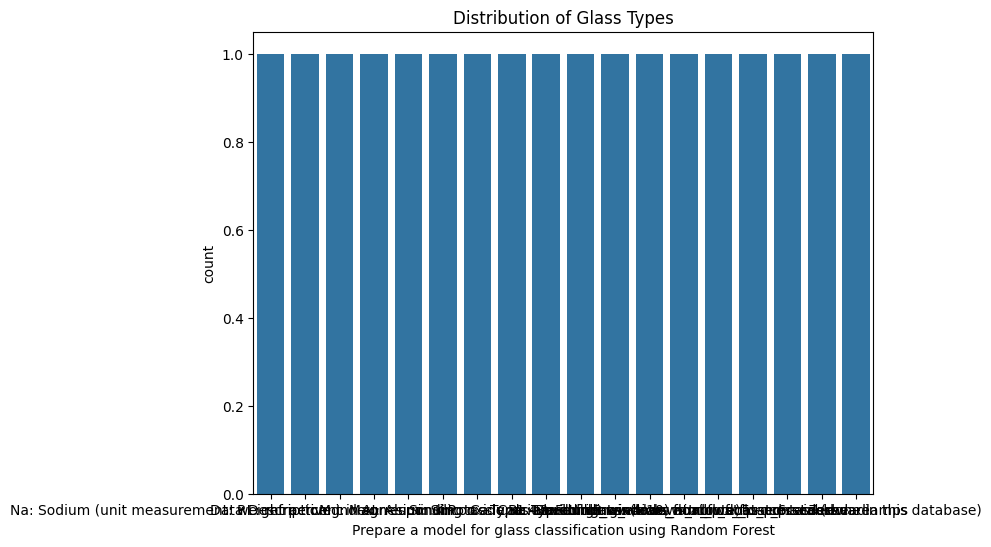

In [ ]:
# Explore the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Prepare a model for glass classification using Random Forest', data=df)
plt.title("Distribution of Glass Types")
plt.show()

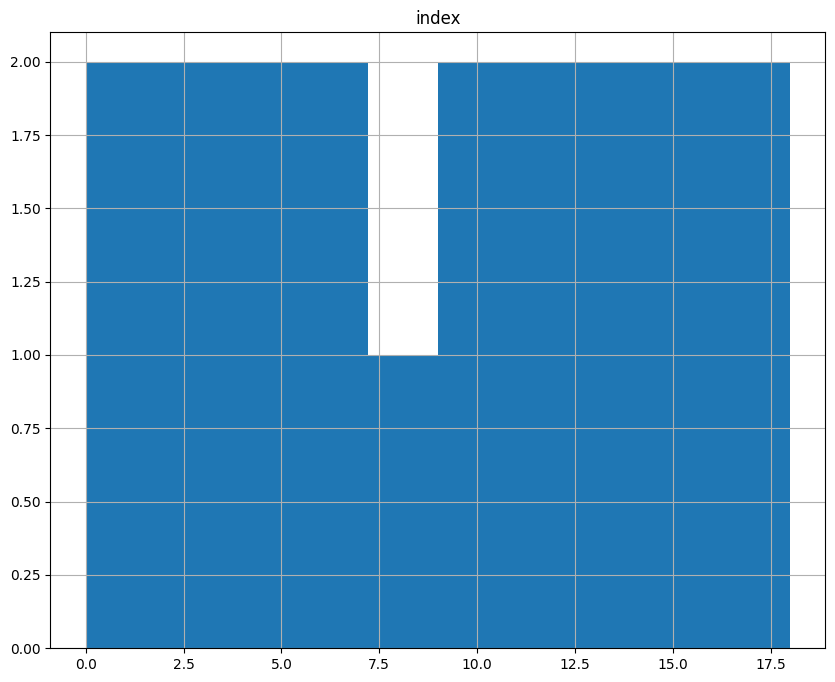

In [ ]:
# Convert the index to a regular column
df = df.reset_index()

# Check data types and convert if needed
# If 'Prepare a model for glass classification using Random Forest' should be numerical, convert it
# df['Prepare a model for glass classification using Random Forest'] = pd.to_numeric(df['Prepare a model for glass classification using Random Forest'], errors='coerce')  # 'coerce' handles errors

# Now try creating the histogram again
df.hist(figsize=(10, 8))
plt.show()


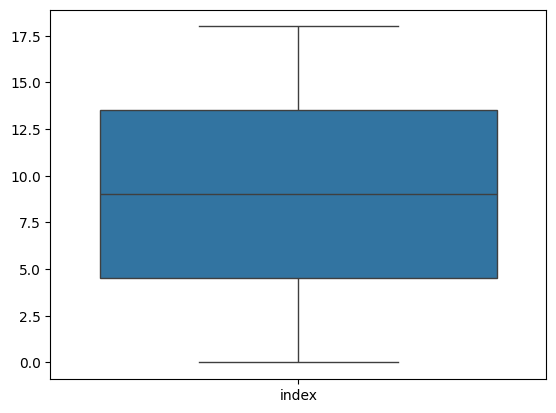

In [ ]:
# Create box plots for each feature
sns.boxplot(data=df)
plt.show()

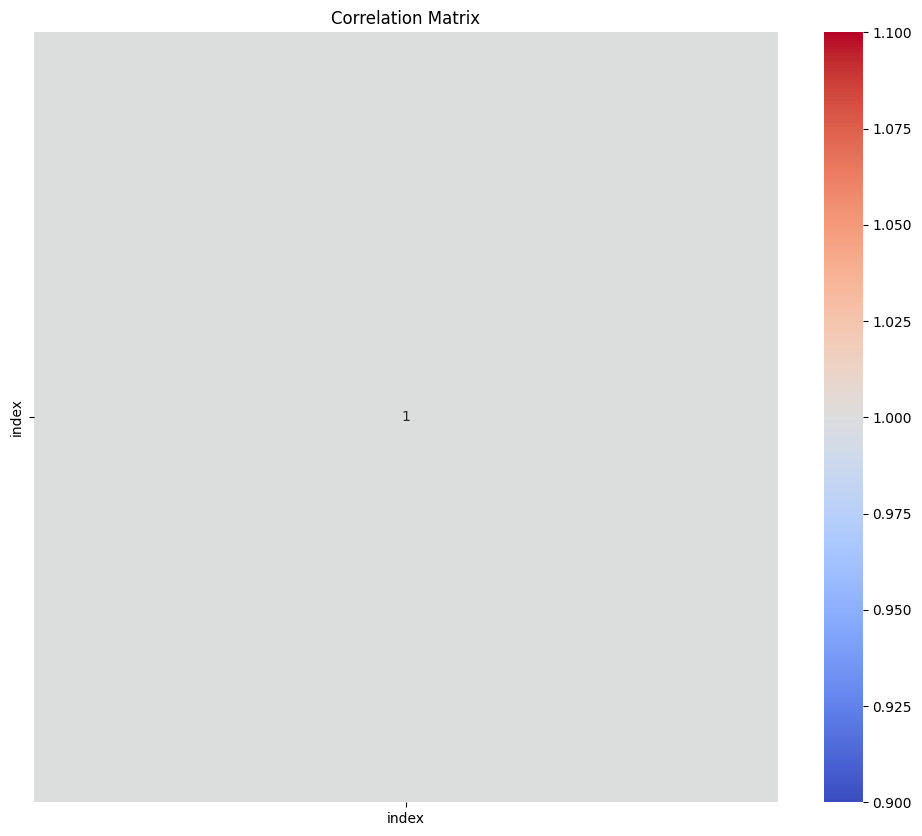

In [ ]:
# Correlation matrix
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Histograms allow you to visualize the distribution of individual features.

Pair plots are useful to visualize relationships between features and the class label.

A correlation heatmap can help identify how features are correlated with each other and with the target variable.

**3: Data Preprocessing**

In [ ]:
#Categorical Variable Encoding (if applicable)
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("Categorical Columns:", categorical_cols)

    for col in categorical_cols:
        le = LabelEncoder()
        # Use df instead of df_filled
        df[col] = le.fit_transform(df[col])
else:
    print("No categorical columns detected.")

Categorical Columns: Index(['Prepare a model for glass classification using Random Forest'], dtype='object')


In [ ]:
#Feature Scaling
# Separate features and target variable
X = df.drop('Prepare a model for glass classification using Random Forest', axis=1)  # Assuming 'Type' is the target variable
y = df['Prepare a model for glass classification using Random Forest']

# Scale features using standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**4: Random Forest Model Implementation**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Handle Imbalance data
# The type distribution should be examined, and techniques like SMOTE or RandomOverSampler used if required.

from imblearn.over_sampling import SMOTE  # This line should have no leading spaces
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)  #use X_train_resampled, y_train_resampled if resampling was performed

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test)  # Predict on the test data
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Accuracy: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**5: Bagging and Boosting Methods**

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier  # Import BaggingClassifier

bagging_classifier = BaggingClassifier(random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("\nBagging Accuracy:", bagging_accuracy)
print(classification_report(y_test, bagging_predictions))


Bagging Accuracy: 0.0
              precision    recall  f1-score   support

          10       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier

boosting_classifier = AdaBoostClassifier(random_state=42)
boosting_classifier.fit(X_train, y_train)
boosting_predictions = boosting_classifier.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)
print("\nBoosting (AdaBoost) Accuracy:", boosting_accuracy)
print(classification_report(y_test, boosting_predictions))


Boosting (AdaBoost) Accuracy: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



**Additional Notes:**


**Q.1). Explain Bagging and Boosting methods. How is it different from each other.**

**Bagging (Bootstrap Aggregating):**
Concept: Bagging involves training multiple independent models in parallel on different subsets of the training data and then combining their predictions to improve overall performance. The goal is to reduce variance (i.e., overfitting) and improve accuracy.

Models are trained independently in parallel.

The data for each model is obtained by sampling the original dataset with replacement (bootstrap sampling), meaning some data points may appear multiple times in a given subset, and others may be left out.

Voting or averaging is used to combine the predictions of the individual models.
Typically used with high-variance models like Decision Trees.

The process reduces overfitting but does not necessarily improve bias.

**Boosting Concept:**

Boosting involves training models sequentially, where each model tries to correct the mistakes made by the previous model. The models are dependent on each other, and the focus is on the difficult-to-predict instances. Boosting works by adjusting the weights of the training samples based on their performance, giving more importance to the misclassified data points.

Models are trained sequentially; each model corrects the errors made by the previous one.

The model that misclassifies data points is given more weight in the subsequent models.

The final prediction is a weighted sum of the individual models’ predictions.

Typically used with weak learners (models that perform slightly better than random guessing, e.g., shallow decision trees).

The process reduces bias and can lead to high accuracy, especially for complex datasets.


**Q.2). Explain how to handle imbalance in the data.**

Imbalanced datasets occur when one class is underrepresented relative to the other. This often leads to biased models that are unable to predict the minority class accurately. Below are techniques to handle imbalance:

**1. Resampling Techniques:**

Oversampling the Minority Class:

SMOTE (Synthetic Minority Over-sampling Technique):

I) SMOTE creates synthetic examples of the minority class by generating new data points that are similar to existing ones. This helps to balance the class distribution.

II) Random Oversampling: Involves duplicating examples from the minority class to balance the dataset.

Undersampling the Majority Class:

I) Random Undersampling: Involves reducing the number of examples from the majority class to balance the dataset. This might result in loss of valuable information.
II) Cluster-Based Undersampling: The majority class is clustered, and then a sample of representative data points is selected from each cluster.

**2. Class Weighting:**

Many machine learning algorithms (including Random Forest, SVM, Logistic Regression) allow you to assign different weights to each class. Assigning higher weights to the minority class forces the model to pay more attention to the minority class during training.

**3. Ensemble Methods:**

Balanced Random Forest: A variation of Random Forest that uses undersampling in each iteration to balance the class distribution.

EasyEnsemble: A technique that generates balanced sets by using random undersampling and then builds an ensemble of classifiers.

**4. Anomaly Detection (for extreme imbalance):**

In some cases, particularly when the minority class represents rare events, it might be better to treat the problem as an anomaly detection task. This approach focuses on identifying rare, anomalous data points.

**5. Evaluation Metrics for Imbalanced Data:**

In an imbalanced dataset, accuracy alone is not a good evaluation metric because a model that always predicts the majority class can still achieve high accuracy. Instead, use metrics that provide more insight into model performance on imbalanced data:

Precision: The proportion of true positives among the predicted positives.
Recall (Sensitivity): The proportion of true positives among the actual positives.

F1-Score: The harmonic mean of precision and recall, especially useful when you need a balance between precision and recall.

ROC Curve and AUC: Receiver Operating Characteristic curve and the Area Under the Curve (AUC) measure the trade-off between true positive rate and false positive rate.
